<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>Decision Trees</center>


In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. 

### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [2]:
import numpy as np 
import pandas 
from sklearn.tree import DecisionTreeClassifier

Next, a little information about the dataset. We are using a dataset called skulls.csv, which contains the measurements made on Egyptian skulls from five epochs.

<img src = "https://ibm.box.com/shared/static/02z8krlr99hwrqa2ecx3ycuiwqkcuzjv.png", align = 'left'>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<b>epoch</b> - The epoch the skull as assigned to, a factor with levels c4000BC c3300BC, c1850BC, c200BC, and cAD150, where the years are only given approximately.

<b>mb</b> - Maximal Breadth of the skull.

<b>bh</b> - Basiregmatic Heights of the skull.

<b>bl</b> - Basilveolar Length of the skull.

<b>nh</b> - Nasal Heights of the skull.

---

In [20]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")
print(my_data.shape)

(150, 6)


In [5]:
print(my_data[0:5])  

   Unnamed: 0    epoch   mb   bh   bl  nh
0           1  c4000BC  131  138   89  49
1           2  c4000BC  125  131   92  48
2           3  c4000BC  131  132   99  50
3           4  c4000BC  119  132   96  44
4           5  c4000BC  136  143  100  54


Using <b>my_data</b> as the skulls.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
    <li> <b> y </b> as the <b> response vector (target) </b> </li>

    
    <li> <b> targetNames </b> as the <b> response vector names (target names)</b> </li>
    
    
    <li> <b> featureNames </b> as the <b> feature matrix column names </b> </li>
   
</ul>

Lets first get the attribute names for dataset

In [7]:
featureNames = list(my_data.columns.values)[2:6]
print(featureNames)

['mb', 'bh', 'bl', 'nh']


In [9]:
# Remove the column containing the target name since it doesn't contain numeric values.
# axis=1 means we are removing columns instead of rows.
X = my_data.drop(my_data.columns[[0,1]], axis=1).values
print(X)
X[0:5]
print(X[0:5])

[[131 138  89  49]
 [125 131  92  48]
 [131 132  99  50]
 [119 132  96  44]
 [136 143 100  54]
 [138 137  89  56]
 [139 130 108  48]
 [125 136  93  48]
 [131 134 102  51]
 [134 134  99  51]
 [129 138  95  50]
 [134 121  95  53]
 [126 129 109  51]
 [132 136 100  50]
 [141 140 100  51]
 [131 134  97  54]
 [135 137 103  50]
 [132 133  93  53]
 [139 136  96  50]
 [132 131 101  49]
 [126 133 102  51]
 [135 135 103  47]
 [134 124  93  53]
 [128 134 103  50]
 [130 130 104  49]
 [138 135 100  55]
 [128 132  93  53]
 [127 129 106  48]
 [131 136 114  54]
 [124 138 101  46]
 [124 138 101  48]
 [133 134  97  48]
 [138 134  98  45]
 [148 129 104  51]
 [126 124  95  45]
 [135 136  98  52]
 [132 145 100  54]
 [133 130 102  48]
 [131 134  96  50]
 [133 125  94  46]
 [133 136 103  53]
 [131 139  98  51]
 [131 136  99  56]
 [138 134  98  49]
 [130 136 104  53]
 [131 128  98  45]
 [138 129 107  53]
 [123 131 101  51]
 [130 129 105  47]
 [134 130  93  54]
 [137 136 106  49]
 [126 131 100  48]
 [135 136  9

In [13]:
targetNames = my_data["epoch"].unique().tolist()
targetNames

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']

In [12]:
y = my_data["epoch"]
y[0:5]

0    c4000BC
1    c4000BC
2    c4000BC
3    c4000BC
4    c4000BC
Name: epoch, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [15]:
from sklearn.cross_validation import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [18]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [19]:
print (X_trainset.shape)
print (y_trainset.shape)

(105, 4)
(105,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [21]:
print (X_testset.shape)
print (y_testset.shape)

(45, 4)
(45,)


We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>skullsTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [23]:
skullsTree = DecisionTreeClassifier(criterion="entropy")
print(skullsTree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [24]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [25]:
predTree = skullsTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [26]:
print (predTree [0:5])
print (y_testset [0:5])

['c3300BC' 'c4000BC' 'c1850BC' 'c200BC' 'c3300BC']
47    c3300BC
3     c4000BC
31    c3300BC
25    c4000BC
15    c4000BC
Name: epoch, dtype: object


Next, let's import metrics from sklearn and check the accuracy of our model.

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy: 


(None, 0.24444444444444444)

You can also visualize your decision tree:

In [45]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [31]:
# You can uncomment and install pydotplus if you have not installed before.
#!pip install pydotplus

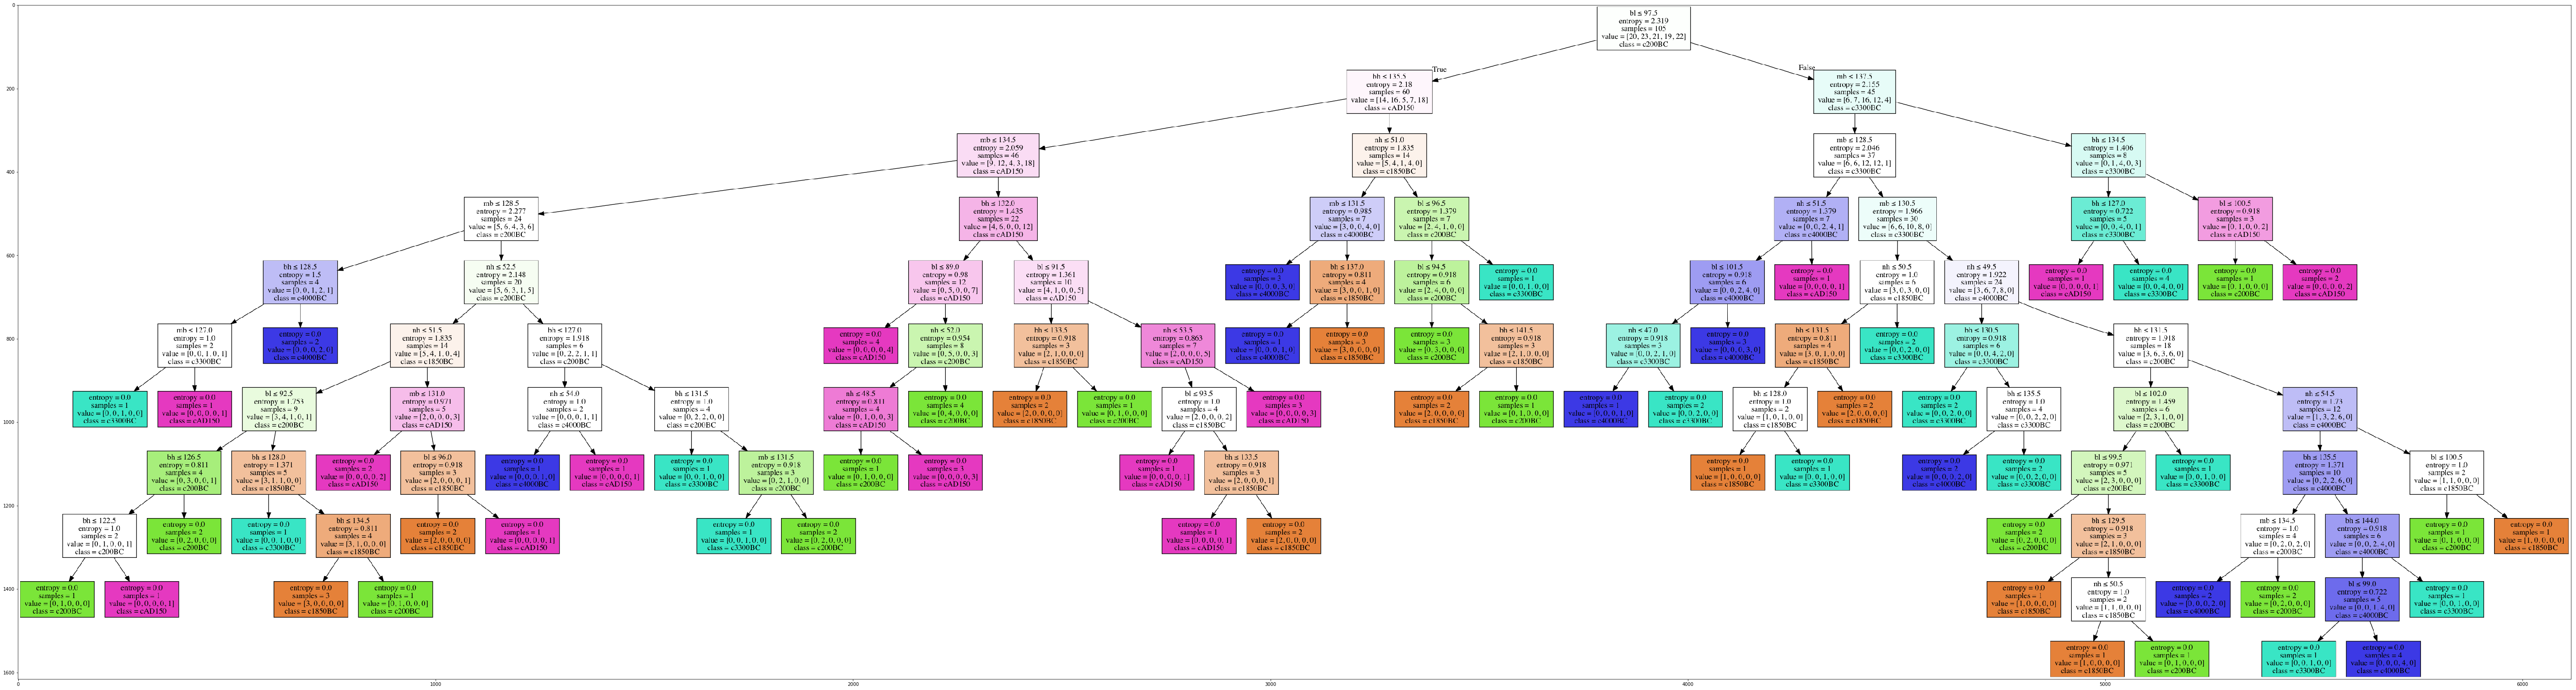

In [46]:
dot_data = StringIO()
filename = "skulltree.png"
out=tree.export_graphviz(skullsTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​